In [1907]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1908]:
df=pd.read_csv("data.csv")
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [1909]:
# #Normalizing the data
# from sklearn import preprocessing
# d=preprocessing.normalize(df)
# scaled_df=pd.DataFrame(d,columns=['AT','V','AP','RH','PE'])
# scaled_df

In [1910]:
df.rename(columns={'AT': 'Average Temperature', 'V': 'Exhaust Vacuum','AP': 'Ambient Pressure',
                   'RH': 'Relative Humidity ','PE': 'Net Hourly Electrical Energy Output'}, inplace=True)
df.head()

,Average Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Net Hourly Electrical Energy Output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [1911]:
df.isnull().sum()
df['Net Hourly Electrical Energy Output'].mean()

454.3650094063554

In [1912]:
x = df.drop("Net Hourly Electrical Energy Output", axis=1).values
y = df["Net Hourly Electrical Energy Output"].values
y=y.reshape((9568,1))


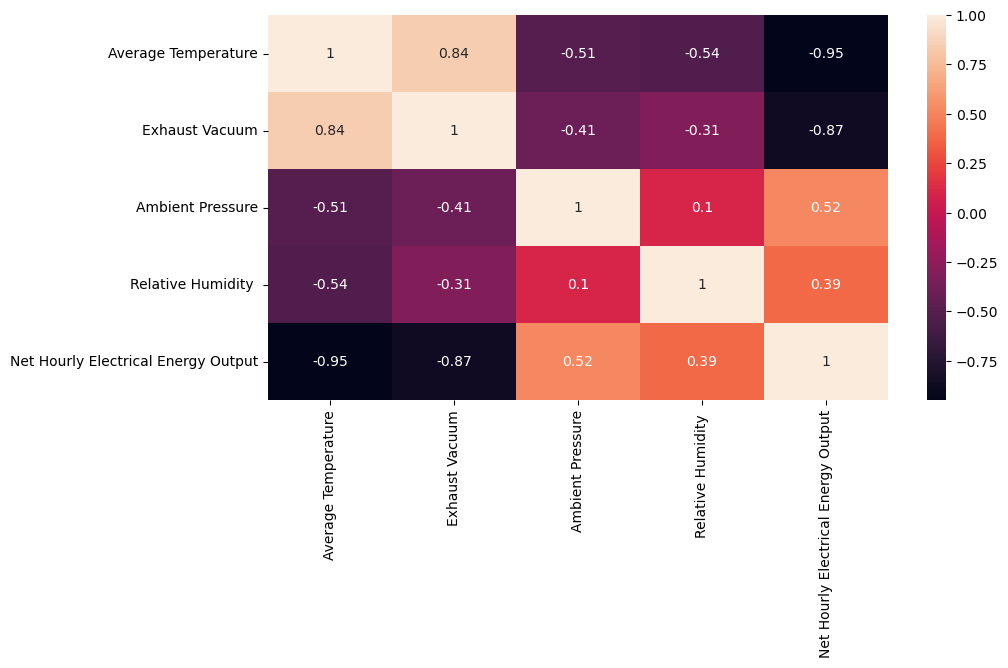

In [1913]:
corr=df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True)
plt.show()

In [1914]:
#splitting the dataset into training, validation and testing
from sklearn.model_selection import train_test_split

x_train,x_rem,y_train,y_rem = train_test_split(x, y, train_size = 0.8, random_state = 1)
x_valid,x_test,y_valid,y_test = train_test_split(x_rem, y_rem, test_size=0.5, random_state=1)

print(x_train.shape),print(y_train.shape)

(7654, 4)
(7654, 1)


(None, None)

In [1915]:
#defining sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [1916]:
#defining derivative of sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [1917]:
def layer_size(x_train,y_train):
    shape_x=x_train.shape
    shape_y=y_train.shape
    m=x_train.size/shape_x[1]#no of training examples

    input_neurons=x_train.shape[1] #4
    hidden_neurons=8
    output_neurons=y_train.shape[1] #1
    return (input_neurons,hidden_neurons,output_neurons)

In [1918]:
def initial_parameters(input_neurons,hidden_neurons,output_neurons):
    np.random.seed(2)
    w1=np.random.randn(hidden_neurons,input_neurons)*0.01 #1st layer weights
    b1=np.random.randn(hidden_neurons,1) #1st layer biases
    
    w2=np.random.randn(output_neurons,hidden_neurons)*0.01 #2nd layer weights
    b2=np.random.randn(output_neurons,1) #2nd layer bias
    
    parameters = {"w1": w1,
                  "b1": b1,
                  "w2": w2,
                  "b2": b2}
    
    return parameters

In [1919]:
def forward_propagation(x_train,parameters):
    w1 = parameters["w1"]
    b1 = parameters["b1"]
    w2 = parameters["w2"]
    b2 = parameters["b2"]
    
    z1=np.dot(w1,x_train.T)+b1
    a1=sigmoid(z1)
    z2=np.dot(w2,a1)+b2
    a2=(z2)
    
    
    
    
    cache = {"z1": z1,
             "a1": a1,
             "z2": z2,
             "a2": a2}
    
    return a2, cache

In [1920]:
def cost_func(a2,y_train,parameters):
    w1 = parameters["w1"]
    b1 = parameters["b1"]
    w2 = parameters["w2"]
    b2 = parameters["b2"]
    
    bb=np.power((a2-(y_train.T)),2)
    bbc=(np.sum(bb,axis=1))
    
    

In [1921]:
def back_propagation(parameters,cache,x_train,y_train):
    m=7654
    
    w1 = parameters["w1"]
    b1 = parameters["b1"]
    w2 = parameters["w2"]
    b2 = parameters["b2"]
    
    a1 = cache["a1"]
    a2 = cache["a2"]
    z1 = cache["z1"]
    z2 = cache["z2"]
    
    dz2 = (z2-y_train.T)
    dw2 = 1/(2*m) * np.dot(dz2,a1.T)
    db2 = 1/(2*m) * (np.sum(dz2,axis=1,keepdims=True))
    
    
    
#     dz1=np.multiply(
    dz1 = (np.dot(w2.T,dz2))*sigmoid_derivative(a1)
    dw1 = 1/(2*m) * np.dot(dz1,x_train)
    db1 = 1/(2*m) * np.sum(dz1,axis=1,keepdims=True)
    
#     print(dw1.shape)
#     cost_func(a2,y_train,parameters)
#     print(y_train.shape)
    
    grads = {"dw1": dw1,
             "db1": db1,
             "dw2": dw2,
             "db2": db2}
    
    return grads,dz2

In [1922]:
def update(parameters,grads,learning_rate):
    w1 = parameters["w1"]
    b1 = parameters["b1"]
    w2 = parameters["w2"]
    b2 = parameters["b2"]
    
    dw1 = grads["dw1"]
    db1 = grads["db1"]
    dw2 = grads["dw2"]
    db2 = grads["db2"]
    
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    
    
    parameters = {"w1": w1,
                  "b1": b1,
                  "w2": w2,
                  "b2": b2}
    
    return parameters

In [1923]:
learning_rate=0.05
input_neurons,hidden_neurons,output_neurons = layer_size(x_train,y_train)
parameters = initial_parameters(input_neurons,hidden_neurons,output_neurons)

w1=parameters['w1']
b1=parameters['b1']
w2=parameters['w2']
b2=parameters['b2']

z2=cache['z2']

epoch=100
for i in range (epoch):
    
    a2,cache=forward_propagation(x_train,parameters)
    
    cost=cost_func(a2,y_train,parameters)
    
    grads,dz2=back_propagation(parameters,cache,x_train,y_train)
    
    parameters=update(parameters,grads,learning_rate)
    
    y_pred=a2+dz2
    
print('The predicted values from the model are:')
print(np.squeeze(y_pred))


The predicted values from the model are:
[424.40196733 459.68196733 436.86196733 ... 446.16196733 458.35196733
 455.78196733]


/var/folders/_8/2d7c19hn1tvf_8f1bzzyhgqr0000gn/T/ipykernel_15302/1375434823.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
